# 3. Základné operácie s obrazmi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.color import rgb2gray
from skimage import io, data, transform

plt.rcParams['font.size'] = 18

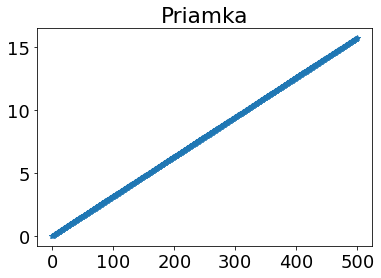

In [2]:
x = np.linspace(0, 5*np.pi, 500)
plt.title('Priamka')
plt.plot(x, "-*");

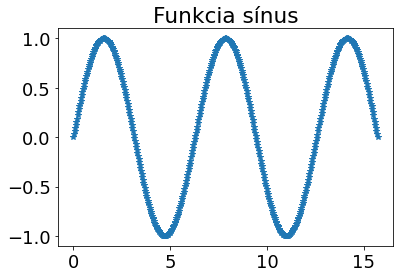

In [3]:
plt.figure()
y = np.sin(x)
plt.title('Funkcia sínus')
plt.plot(x, y, "*-");

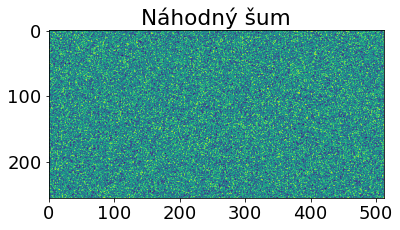

In [4]:
plt.figure()
rand_img = np.random.rand(256, 512)
plt.title('Náhodný šum')
plt.imshow(rand_img);

Obrázok astronautky je zložený z troch farebných kanálov: červeného (Red), zeleného
(Green) a modrého (Blue), je nazývaný kompozitný, RGB alebo „truecolor“. Jednotlivé kanály
predstavujú jednotlivé 512x512 rozmerné vrstvy trojrozmernej matice.

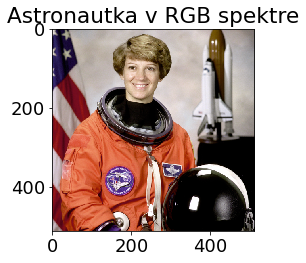

In [5]:
image = data.astronaut()
fig, ax = plt.subplots()
plt.title('Astronautka v RGB spektre')
io.imshow(image);

Takto môžeme zobraziť jednotlivé kanály obrázku, potlačiť ostatné kanály a ponechať
len červený alebo zobraziť šedotónový obrázok.

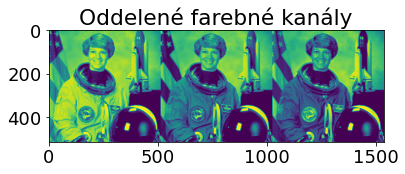

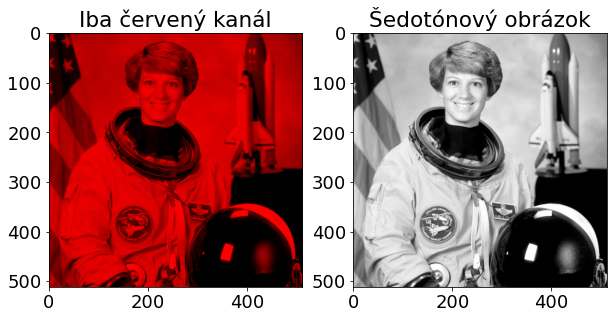

In [6]:
plt.figure()
plt.title('Oddelené farebné kanály')
plt.imshow(np.concatenate((image[:, :, 0], image[:, :, 1], image[:, :, 2]), 1))

plt.figure(figsize= (10, 10))
plt.subplot(121)
plt.title('Iba červený kanál')
imageR = np.array(image)
imageR[:, :, 1:] = 0
plt.imshow(imageR)

plt.subplot(122)
plt.title('Šedotónový obrázok')
img = imageR[:, :, 0].astype(dtype = np.uint8)
plt.imshow(img, cmap= 'gray');

Pomer strán obrázku je možné zmeniť príkazom *axis.set_aspect*. Jedná sa o nastavenie mierky
osi, t.j. pomer y ku x.

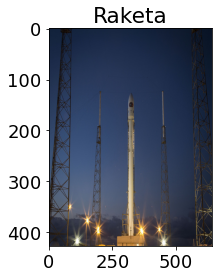

In [7]:
rocket = data.rocket()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Raketa')
plt.imshow(rocket)
ax.set_aspect(2);

Previesť RGB obrázok na šedotónový nie je zložité. Jeden z možných postupov je uvedený nižšie.
Všimnite si, že jednotlivé farebné kanály neprispievajú do výsledku rovnako, lebo oko nie je
na jednotlivé farebné zložky rovnako citlivé. Jednoduchým spriemerovaním by sme dostali
nevýrazný obrázok. Môžete si tiež všimnúť, že výsledok nie je identický s výsledkom funkcie
_rgb2gray_. *rgb2gray* používa mierne odlišnú sadu konštánt (0.2989*R + 0.5870*G + 0.1140*B).

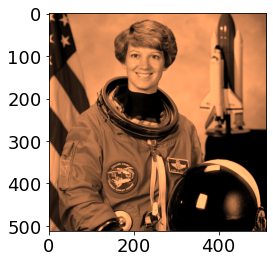

In [8]:
iGray = 0.2126 * image[:,:,0] + 0.7152 * image[:,:,1] + 0.0722 * image[:,:,2]
iGray = iGray.astype(dtype= np.uint8)
plt.figure()
plt.imshow(iGray, cmap= 'copper');

Môžeme porovnať náš výpočet s funkciou *rgb2gray* a zistiť na koľko sa od seba jednotlivé
metódy líšia. Odčítaním výsledných obrázkov si môžeme zobraziť rozdiely výpočtov.

Suma chyby medzi metódami:  1012
Priemerná chyba:  0.0038604736328125


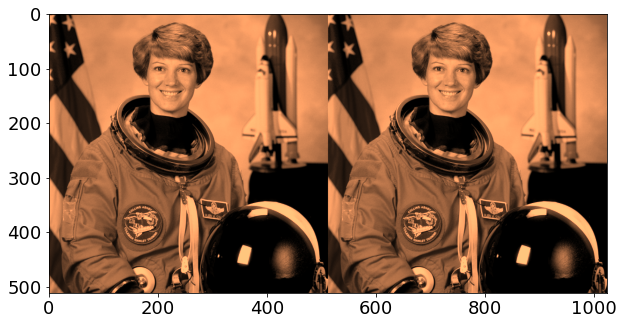

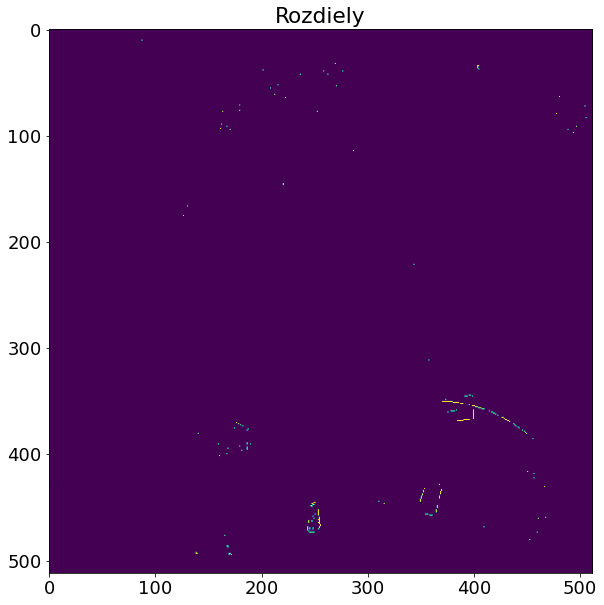

In [9]:
iGray2 = (rgb2gray(image) * 255).astype(dtype=np.uint8)
print("Suma chyby medzi metódami: ", np.sum((iGray2 - iGray) ** 2))
print("Priemerná chyba: ", np.sum((iGray2 - iGray)**2 / iGray2.size))

plt.figure(figsize= (10, 10))
plt.imshow(np.concatenate((iGray, iGray2), 1), cmap= 'copper')

plt.figure(figsize= (10, 10))
plt.title('Rozdiely')
plt.imshow(iGray - iGray2);

Obrázky možno otáčať a meniť ich veľkosť. Keďže sú to tiež matice, je možne s nimi prevádzať
matematické operácie, ako napríklad umocniť všetky pixely.

Suma chyby medzi metódami:  359.5713177302601
Priemerná chyba:  0.00011430464354523347


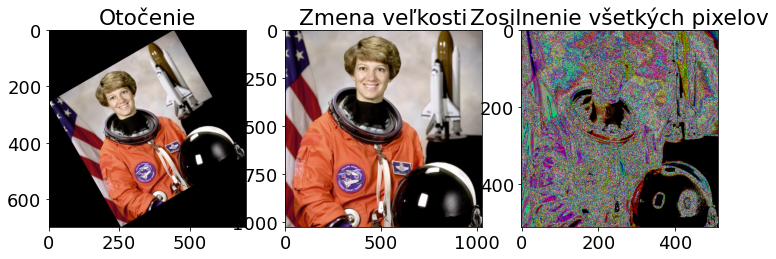

In [10]:
iRotated = transform.rotate(image, 30, resize= 'True')
plt.figure(figsize= (12, 12))
plt.subplot(131)
plt.title('Otočenie')
plt.imshow(iRotated)

iResized = transform.resize(image, np.array(iGray.shape) * 2, order= 1)
iResized2 = transform.resize(image, np.array(iGray.shape) * 2, order= 4)
print("Suma chyby medzi metódami: ", np.sum((iResized2 - iResized)**2))
print("Priemerná chyba: ", np.sum((iResized2 - iResized)**2 / iResized2.size))

plt.subplot(132)
plt.title('Zmena veľkosti')
plt.imshow(iResized)

plt.subplot(133)
plt.title('Zosilnenie všetkých pixelov')
plt.imshow(image**2);

Konvolúcia so zachovaním pôvodnej veľkosti obrázka.

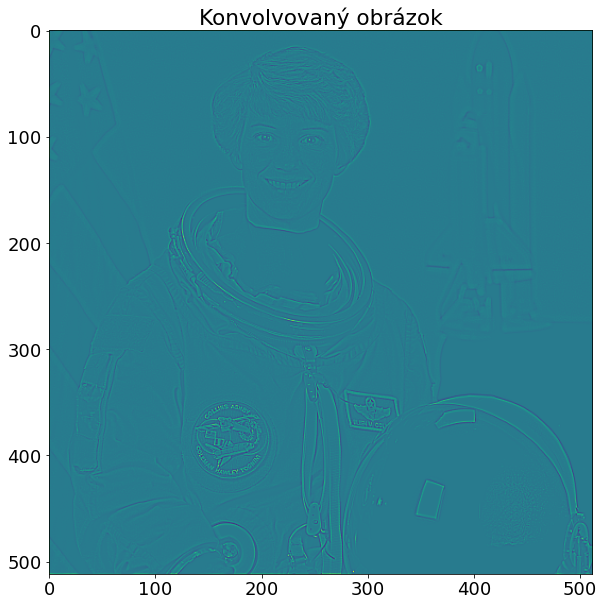

In [11]:
plt.figure(figsize= (10, 10))
g = np.array(np.array([[1, 2, 1]]) * np.array([[1], [2], [1]]) / 16)
convolvedImg = signal.convolve2d(rgb2gray(image), g, 'same')
plt.title('Konvolvovaný obrázok')
plt.imshow(rgb2gray(image) - convolvedImg);

### Úloha
Napíšte vlastný program, ktorý načíta obrázok, rozdelí ho pomyselnou mriežkou vami
definovaných rozmerov a jednotlivé výrezy obrázku náhodne poprehadzuje. Zobrazte výsledok.